In [31]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import torchvision
import torchvision.transforms as transforms

In [32]:
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [34]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,64,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,128,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,64,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(64,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))

In [35]:
# Import MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [36]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [37]:
model = CNN().to(device)

In [38]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [39]:
# Train the model
def trainModel(model, num_epochs,train_loader,optimizer):
    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):  
            # origin shape: [100, 1, 28, 28]
            # resized: [100, 784]
            # images = images.reshape(-1, 28*28).to(device)
            images = images.to(device)
            labels = labels.to(device)
    
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
    
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

In [40]:
trainModel(model,1, train_loader, optimizer)

Epoch [1/1], Step [100/600], Loss: 0.4494
Epoch [1/1], Step [200/600], Loss: 0.2115
Epoch [1/1], Step [300/600], Loss: 0.1300
Epoch [1/1], Step [400/600], Loss: 0.1775
Epoch [1/1], Step [500/600], Loss: 0.1908
Epoch [1/1], Step [600/600], Loss: 0.1489


In [41]:
class CNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,32,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(32,64,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,32,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(32,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))

In [42]:
class CNN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,16,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(16,32,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(32,16,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(16,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))

In [43]:
class CNN4(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,64,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,128,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,256,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(256,128,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,64,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(64,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))

In [44]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay as cdm
def test(model, test_loader):
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  
    return correct/total

In [45]:
m1 = CNN().to(device)
m2 = CNN2().to(device)
m3 = CNN3().to(device)
m4 = CNN4().to(device)

o1 = torch.optim.Adam(m1.parameters(), lr=learning_rate)
o2 = torch.optim.Adam(m2.parameters(), lr=learning_rate)
o3 = torch.optim.Adam(m3.parameters(), lr=learning_rate)
o4 = torch.optim.Adam(m4.parameters(), lr=learning_rate)

In [46]:
#trainModel(m1,2, train_loader, o1)
trainModel(m2,2, train_loader, o2)
trainModel(m3,2, train_loader, o3)
trainModel(m4,2, train_loader, o4)

Epoch [1/2], Step [100/600], Loss: 0.4517
Epoch [1/2], Step [200/600], Loss: 0.2370
Epoch [1/2], Step [300/600], Loss: 0.3981
Epoch [1/2], Step [400/600], Loss: 0.1176
Epoch [1/2], Step [500/600], Loss: 0.2224
Epoch [1/2], Step [600/600], Loss: 0.2107
Epoch [2/2], Step [100/600], Loss: 0.2207
Epoch [2/2], Step [200/600], Loss: 0.0982
Epoch [2/2], Step [300/600], Loss: 0.1471
Epoch [2/2], Step [400/600], Loss: 0.0782
Epoch [2/2], Step [500/600], Loss: 0.0970
Epoch [2/2], Step [600/600], Loss: 0.1547
Epoch [1/2], Step [100/600], Loss: 0.9612
Epoch [1/2], Step [200/600], Loss: 0.7090
Epoch [1/2], Step [300/600], Loss: 0.6129
Epoch [1/2], Step [400/600], Loss: 0.4518
Epoch [1/2], Step [500/600], Loss: 0.2522
Epoch [1/2], Step [600/600], Loss: 0.2983
Epoch [2/2], Step [100/600], Loss: 0.1883
Epoch [2/2], Step [200/600], Loss: 0.1612
Epoch [2/2], Step [300/600], Loss: 0.1892
Epoch [2/2], Step [400/600], Loss: 0.2734
Epoch [2/2], Step [500/600], Loss: 0.0994
Epoch [2/2], Step [600/600], Loss:

In [47]:
m2a = test(m2,test_loader)
m3a = test(m3,test_loader)
m4a = test(m4,test_loader)
m1a = test(model,test_loader)

In [48]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [49]:
m2p = count_parameters(m2)
m3p = count_parameters(m3)
m4p = count_parameters(m4)
m1p = count_parameters(model)

In [50]:
import numpy as np
x = [m1p,m1p-m2p,m1p-m3p,m4p-m1p]


In [51]:
x = np.array(x)

In [52]:
x / m1p * 100

array([100.        ,  74.53237026,  93.34170016, 394.00259015])

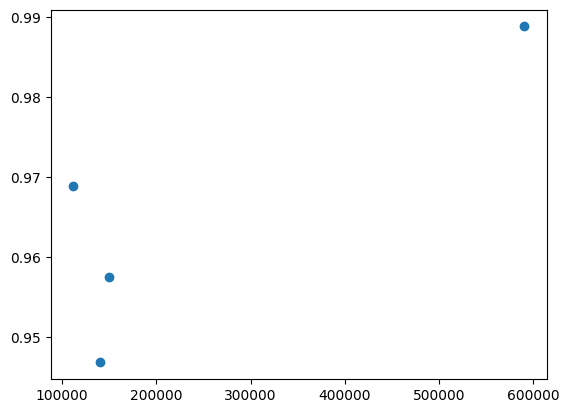

In [53]:
y = np.array([m1a, m2a, m3a, m4a])
plt.scatter(x,y)

In [54]:
y

array([0.9575, 0.9688, 0.9468, 0.9888])

In [55]:
x

array([149798, 111648, 139824, 590208])

In [ ]:

Q1

Implement convolution operation for a sample image of shape (H=6, W=6, C=1) with a random kernel of size (3,3) using torch.nn.functional.conv2d.

What is the dimension of the output image? Apply, various values for parameter stride=1 and note the change in the dimension of the output image. Arrive at an equation for the output image size with respect to the kernel size and stride and verify your answer with code. Now, repeat the exercise by changing padding parameter. Obtain a formula using kernel, stride, and padding to get the output image size. What is the total number of parameters in your network? Verify with code.

import torch
import torch.nn.functional as F

image = torch.rand(6,6)
print("image=", image)
#Add a new dimension along 0th dimension
#i.e. (6,6) becomes (1,6,6). This is because
#pytorch expects the input to conv2D as 4d tensor
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
print("image=", image)
kernel = torch.ones(3,3)
#kernel = torch.rand(3,3)
print("kernel=", kernel)
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)

def out_dim(in_shape,stride,padding,kernel_shape):
    out_shape = [0 for i in range(4)]
    for dim in range(len(in_shape)):
        out_shape[dim] = (in_shape[dim] + 2*padding - kernel_shape[dim])//stride + 1
    return out_shape
    
#Stride 1 Padding 0
outimage = F.conv2d(image, kernel, stride=1, padding=0)
print("outimage=", outimage)
print("Dimension of output image S-1 P-0: ",outimage.shape)
print("Manually dim of output S-1 P-0: ",out_dim(image.shape,1,0,kernel.shape))

#Stride 1 Padding 1
outimage = F.conv2d(image, kernel, stride=1, padding=1)
print("Dimension of output image S-1 P-1:",outimage.shape)
print("Manually dim of output S-1 P-1: ",out_dim(image.shape,1,1,kernel.shape))

#Stride 1 Padding 2
outimage = F.conv2d(image, kernel, stride=1, padding=2)
print("Dimension of output image S-1 P-2:",outimage.shape)
print("Manually dim of output S-1 P-2: ",out_dim(image.shape,1,2,kernel.shape))

#Stride 2 Padding 1
outimage = F.conv2d(image, kernel, stride=2, padding=1)
print("Dimension of output image S-2 P-1: ",outimage.shape)
print("Manually dim of output S-2 P-1: ",out_dim(image.shape,2,1,kernel.shape))

#Stride 3 Padding 1
outimage = F.conv2d(image, kernel, stride=3, padding=1)
print("Dimension of output image S-2 P-1:",outimage.shape)
print("Manually dim of output S-3 P-1: ",out_dim(image.shape,3,1,kernel.shape))

print("Number of Learnable Parameters = 9")

image= tensor([[0.1186, 0.7337, 0.9362, 0.6941, 0.9227, 0.1054],
        [0.0437, 0.4127, 0.3661, 0.6174, 0.4510, 0.1018],
        [0.0351, 0.9308, 0.9723, 0.7033, 0.8682, 0.1331],
        [0.3270, 0.2197, 0.3275, 0.5457, 0.7827, 0.8512],
        [0.8301, 0.7932, 0.5169, 0.0567, 0.7926, 0.9195],
        [0.8814, 0.2048, 0.5625, 0.8749, 0.1683, 0.0961]])
image.shape= torch.Size([1, 6, 6])
image.shape= torch.Size([1, 1, 6, 6])
image= tensor([[[[0.1186, 0.7337, 0.9362, 0.6941, 0.9227, 0.1054],
          [0.0437, 0.4127, 0.3661, 0.6174, 0.4510, 0.1018],
          [0.0351, 0.9308, 0.9723, 0.7033, 0.8682, 0.1331],
          [0.3270, 0.2197, 0.3275, 0.5457, 0.7827, 0.8512],
          [0.8301, 0.7932, 0.5169, 0.0567, 0.7926, 0.9195],
          [0.8814, 0.2048, 0.5625, 0.8749, 0.1683, 0.0961]]]])
kernel= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
outimage= tensor([[[[4.5493, 6.3667, 6.5314, 4.5971],
          [3.6350, 5.0957, 5.6344, 5.0546],
          [4.9527, 5.0661, 5.5659, 5.6531],
          [4.6631, 4.1019, 4.6277, 5.0876]]]])
Dimension of output image S-1 P-0:  torch.Size([1, 1, 4, 4])
Manually dim of output S-1 P-0:  [1, 1, 4, 4]
Dimension of output image S-1 P-1: torch.Size([1, 1, 6, 6])
Manually dim of output S-1 P-1:  [3, 3, 6, 6]
Dimension of output image S-1 P-2: torch.Size([1, 1, 8, 8])
Manually dim of output S-1 P-2:  [5, 5, 8, 8]
Dimension of output image S-2 P-1:  torch.Size([1, 1, 3, 3])
Manually dim of output S-2 P-1:  [2, 2, 3, 3]
Dimension of output image S-2 P-1: torch.Size([1, 1, 2, 2])
Manually dim of output S-3 P-1:  [1, 1, 2, 2]
Number of Learnable Parameters = 9

Q2

Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3 and observe the output. Implement the equivalent of torch.nn.Conv2d using the torch.nn.functional.conv2D to get the same output. You may ignore bias.

import torch.nn as nn
import torch

image= torch.tensor([[[[0.2557, 0.9236, 0.4913, 0.3200, 0.4958, 0.2214],
          [0.7554, 0.6501, 0.0107, 0.8675, 0.5163, 0.6102],
          [0.8228, 0.1919, 0.8724, 0.8043, 0.3882, 0.9689],
          [0.4894, 0.5116, 0.5624, 0.6949, 0.6289, 0.9802],
          [0.3913, 0.2773, 0.1427, 0.3717, 0.4154, 0.3669],
          [0.8327, 0.8157, 0.7192, 0.9387, 0.4569, 0.6776]]]])

conv = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,stride=1,padding=0,bias=False)
print("Kernel parameters for 3 channels: ")
kernel = conv.weight
print(conv.weight)
print("Output image using torch.nn.Conv2d: ")
out_image = print(conv(image))

import torch.nn.functional as F
out_image = F.conv2d(image,kernel,stride=1,padding=0)
print("Output image using torch.nn.functional.conv2d: ")
print(out_image)

Kernel parameters for 3 channels: 
Parameter containing:
tensor([[[[-0.0442, -0.0062,  0.1765],
          [ 0.0043, -0.3088,  0.3210],
          [ 0.1142, -0.2003, -0.3295]]],


        [[[ 0.2522, -0.1952,  0.2530],
          [ 0.0576, -0.2026, -0.1792],
          [-0.0216,  0.1752,  0.1663]]],


        [[[ 0.1334,  0.2059, -0.1624],
          [ 0.0182, -0.1681,  0.0662],
          [-0.0531, -0.0890, -0.0859]]]], requires_grad=True)
Output image using torch.nn.Conv2d: 
tensor([[[[-0.3563, -0.1274, -0.2278, -0.2432],
          [-0.0432, -0.1694, -0.3169, -0.1089],
          [ 0.0831,  0.0602, -0.1804,  0.0947],
          [-0.2690, -0.1873, -0.1555, -0.0782]],

         [[ 0.0793,  0.3803,  0.1059,  0.0877],
          [ 0.0911,  0.2746, -0.0041,  0.3246],
          [ 0.2784, -0.0466,  0.0713,  0.2349],
          [ 0.3512,  0.3800,  0.2487,  0.3445]],

         [[-0.0861,  0.0829, -0.2119, -0.0823],
          [ 0.1535, -0.2789, -0.1432, -0.0407],
          [-0.0901, -0.0240,  0.0776, -0.0866],
          [-0.1294, -0.1112, -0.0775, -0.1246]]]],
       grad_fn=<ConvolutionBackward0>)
Output image using torch.nn.functional.conv2d: 
tensor([[[[-0.3563, -0.1274, -0.2278, -0.2432],
          [-0.0432, -0.1694, -0.3169, -0.1089],
          [ 0.0831,  0.0602, -0.1804,  0.0947],
          [-0.2690, -0.1873, -0.1555, -0.0782]],

         [[ 0.0793,  0.3803,  0.1059,  0.0877],
          [ 0.0911,  0.2746, -0.0041,  0.3246],
          [ 0.2784, -0.0466,  0.0713,  0.2349],
          [ 0.3512,  0.3800,  0.2487,  0.3445]],

         [[-0.0861,  0.0829, -0.2119, -0.0823],
          [ 0.1535, -0.2789, -0.1432, -0.0407],
          [-0.0901, -0.0240,  0.0776, -0.0866],
          [-0.1294, -0.1112, -0.0775, -0.1246]]]],
       grad_fn=<ConvolutionBackward0>)

Q3

Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the classification accuracy in the form of a Confusion matrix. Verify the number of learnable parameters in the model.

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader

class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1,64,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(64,128,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(128,64,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                )
        self.classification_head = nn.Sequential(nn.Linear(64,20,bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20,10,bias=True),)
        
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size,-1))

mnist_trainset = datasets.MNIST(root="./data",download = True,train=True,transform=ToTensor())
train_loader = DataLoader(mnist_trainset,batch_size=50,shuffle=True)
mnist_testset = datasets.MNIST(root="./data",download = True,train=False,transform=ToTensor())
test_loader = DataLoader(mnist_testset,batch_size=50,shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
batch_size=50

total_params = 0
for name,param in model.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

correct,total = 0,0
for i,vdata in enumerate(test_loader):
    tinputs,tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model(tinputs)

    _,predicted = torch.max(toutputs,1)
    total += tlabels.size(0)
    correct += (predicted==tlabels).sum()
        
print(f"Correct = {correct}, Total = {total}")

[1,   100] loss: 2.313
[1,   200] loss: 2.301
[1,   300] loss: 2.291
[1,   400] loss: 2.278
[1,   500] loss: 2.259
[1,   600] loss: 2.221
[1,   700] loss: 2.145
[1,   800] loss: 1.973
[1,   900] loss: 1.635
[1,  1000] loss: 1.279
[1,  1100] loss: 1.000
[1,  1200] loss: 0.809
[2,   100] loss: 0.721
[2,   200] loss: 0.619
[2,   300] loss: 0.535
[2,   400] loss: 0.496
[2,   500] loss: 0.429
[2,   600] loss: 0.412
[2,   700] loss: 0.364
[2,   800] loss: 0.332
[2,   900] loss: 0.314
[2,  1000] loss: 0.303
[2,  1100] loss: 0.302
[2,  1200] loss: 0.296
[3,   100] loss: 0.247
[3,   200] loss: 0.259
[3,   300] loss: 0.252
[3,   400] loss: 0.242
[3,   500] loss: 0.234
[3,   600] loss: 0.220
[3,   700] loss: 0.226
[3,   800] loss: 0.209
[3,   900] loss: 0.226
[3,  1000] loss: 0.208
[3,  1100] loss: 0.206
[3,  1200] loss: 0.188
[4,   100] loss: 0.187
[4,   200] loss: 0.184
[4,   300] loss: 0.179
[4,   400] loss: 0.178
[4,   500] loss: 0.179
[4,   600] loss: 0.177
[4,   700] loss: 0.171
[4,   800] loss: 0.162
[4,   900] loss: 0.168
[4,  1000] loss: 0.153
[4,  1100] loss: 0.155
[4,  1200] loss: 0.154
[5,   100] loss: 0.154
[5,   200] loss: 0.142
[5,   300] loss: 0.161
[5,   400] loss: 0.137
[5,   500] loss: 0.153
[5,   600] loss: 0.127
[5,   700] loss: 0.146
[5,   800] loss: 0.134
[5,   900] loss: 0.126
[5,  1000] loss: 0.119
[5,  1100] loss: 0.125
[5,  1200] loss: 0.119
[6,   100] loss: 0.138
[6,   200] loss: 0.114
[6,   300] loss: 0.115
[6,   400] loss: 0.123
[6,   500] loss: 0.118
[6,   600] loss: 0.125
[6,   700] loss: 0.113
[6,   800] loss: 0.114
[6,   900] loss: 0.129
[6,  1000] loss: 0.111
[6,  1100] loss: 0.102
[6,  1200] loss: 0.105
Finished Training. Final loss = 0.18399189412593842, Total params = 149798
Correct = 9711, Total = 10000

Q4

Modify CNN of Qn. 3 to reduce the number of parameters in the network. Draw a plot of percentage drop in parameters vs accuracy.

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader

class CNNClassifier1(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1,16,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(16,32,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(32,16,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                )
        self.classification_head = nn.Sequential(nn.Linear(16,10,bias=True),)
        
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size,-1))

mnist_trainset = datasets.MNIST(root="./data",download = True,train=True,transform=ToTensor())
train_loader = DataLoader(mnist_trainset,batch_size=50,shuffle=True)
mnist_testset = datasets.MNIST(root="./data",download = True,train=False,transform=ToTensor())
test_loader = DataLoader(mnist_testset,batch_size=50,shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = CNNClassifier1().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.01)
batch_size=50

total_params = 0
for name,param in model1.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model1(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

correct,total = 0,0
for i,vdata in enumerate(test_loader):
    tinputs,tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model1(tinputs)

    _,predicted = torch.max(toutputs,1)
    total += tlabels.size(0)
    correct += (predicted==tlabels).sum()
        
print(f"Correct = {correct}, Total = {total}")

[1,   100] loss: 2.313
[1,   200] loss: 2.300
[1,   300] loss: 2.287
[1,   400] loss: 2.270
[1,   500] loss: 2.249
[1,   600] loss: 2.204
[1,   700] loss: 2.114
[1,   800] loss: 1.891
[1,   900] loss: 1.515
[1,  1000] loss: 1.140
[1,  1100] loss: 0.913
[1,  1200] loss: 0.829
[2,   100] loss: 0.754
[2,   200] loss: 0.701
[2,   300] loss: 0.642
[2,   400] loss: 0.581
[2,   500] loss: 0.530
[2,   600] loss: 0.526
[2,   700] loss: 0.484
[2,   800] loss: 0.491
[2,   900] loss: 0.457
[2,  1000] loss: 0.423
[2,  1100] loss: 0.415
[2,  1200] loss: 0.398
[3,   100] loss: 0.371
[3,   200] loss: 0.332
[3,   300] loss: 0.363
[3,   400] loss: 0.339
[3,   500] loss: 0.348
[3,   600] loss: 0.330
[3,   700] loss: 0.317
[3,   800] loss: 0.321
[3,   900] loss: 0.287
[3,  1000] loss: 0.287
[3,  1100] loss: 0.287
[3,  1200] loss: 0.282
[4,   100] loss: 0.269
[4,   200] loss: 0.287
[4,   300] loss: 0.243
[4,   400] loss: 0.258
[4,   500] loss: 0.268
[4,   600] loss: 0.240
[4,   700] loss: 0.235
[4,   800] loss: 0.235
[4,   900] loss: 0.246
[4,  1000] loss: 0.209
[4,  1100] loss: 0.229
[4,  1200] loss: 0.241
[5,   100] loss: 0.205
[5,   200] loss: 0.209
[5,   300] loss: 0.243
[5,   400] loss: 0.207
[5,   500] loss: 0.211
[5,   600] loss: 0.194
[5,   700] loss: 0.197
[5,   800] loss: 0.195
[5,   900] loss: 0.197
[5,  1000] loss: 0.177
[5,  1100] loss: 0.200
[5,  1200] loss: 0.197
[6,   100] loss: 0.197
[6,   200] loss: 0.196
[6,   300] loss: 0.182
[6,   400] loss: 0.173
[6,   500] loss: 0.194
[6,   600] loss: 0.187
[6,   700] loss: 0.165
[6,   800] loss: 0.158
[6,   900] loss: 0.161
[6,  1000] loss: 0.153
[6,  1100] loss: 0.165
[6,  1200] loss: 0.165
Finished Training. Final loss = 0.20178936421871185, Total params = 9594
Correct = 9481, Total = 10000

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader

mnist_trainset = datasets.MNIST(root="./data",download = True,train=True,transform=ToTensor())
train_loader = DataLoader(mnist_trainset,batch_size=50,shuffle=True)
mnist_testset = datasets.MNIST(root="./data",download = True,train=False,transform=ToTensor())
test_loader = DataLoader(mnist_testset,batch_size=50,shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_fn = nn.CrossEntropyLoss()

class CNNClassifier1(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1,128,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(128,256,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(256,128,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                )
        self.classification_head = nn.Sequential(nn.Linear(128,64,bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(64,20,bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20,10,bias=True),)
        
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size,-1))

class CNNClassifier2(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1,32,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(32,64,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(64,32,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                )
        self.classification_head = nn.Sequential(nn.Linear(32,20,bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20,10,bias=True),)
        
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size,-1))
    
class CNNClassifier3(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1,16,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(16,32,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(32,16,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                )
        self.classification_head = nn.Sequential(nn.Linear(16,10,bias=True),)
        
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size,-1))

model1 = CNNClassifier1().to(device)
model2 = CNNClassifier2().to(device)
model3 = CNNClassifier3().to(device)
optimizer = optim.SGD(model1.parameters(), lr=0.01)
batch_size=50
loss = None
total_params = 0

for name,param in model1.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model1(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

optimizer = optim.SGD(model2.parameters(), lr=0.01)
batch_size=50
loss = None
total_params = 0

for name,param in model2.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model2(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")


loss = None
optimizer = optim.SGD(model3.parameters(), lr=0.01)
batch_size=50

total_params = 0
for name,param in model3.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model3(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")


 

